In [2]:
import pandas as pd
import numpy as np

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [4]:
# Create DataFrame here.

df=pd.read_csv("data/newark_tree_data.csv")


In [5]:
# Display the first few rows of the DataFrame here.
df.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [10]:
# How many columns does the DataFrame contain?
#len(df.columns)

df.shape[1]

54

In [9]:
# What attributes (columns) does this DataFrame contain?
# pd.set_option('display.max_columns', None)
# print(df.describe())

df.columns

Index(['ID', 'ON', 'AREA', 'ADDRESS', 'STREET', 'SITE', 'SIDE', 'ASSIGNED',
       'COMMON', 'BOTANICAL', 'CULTIVAR', 'DBH', 'REMOVAL', 'STEMS', 'COND',
       'MAINTPRIM', 'OBSERVE', 'INSPECT', 'LOCATION', 'NOTES', 'DATE', 'TIME',
       'STAFF', 'XCOORD', 'YCOORD', 'FAILURE', 'LIKELIHOOD', 'TARGET',
       'CONSEQ', 'RISK', 'UNIQUEID', 'EDITTIME', 'SPREAD', 'HEIGHT',
       'CLEARANCE', 'DECAYCL', 'DECAYT', 'DECAYRF', 'DAMC', 'DAMT', 'DAMRF',
       'CAVITYCL', 'CAVITYT', 'CAVITYRF', 'IMPROPMULC', 'IMPROPPRUN',
       'NUTRIENTD', 'PEST', 'GIRDLING', 'STRESS', 'OHUTILITY', 'TOP_HEIGHT',
       'CROWN_M', 'CROWN_DIE'],
      dtype='object')

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [14]:
# Create the new DataFrame here.
ndf =pd.read_csv("data/newark_tree_data.csv", index_col="ID", usecols=["ID","UNIQUEID","BOTANICAL","COND","RISK","HEIGHT"])

In [15]:
# Display the first few rows of the new DataFrame here.
ndf.head()

,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
ID,,,,,
11.0,Thuja occidentalis,Good,Low,LM 20150929141218,40
12.0,Thuja occidentalis,Very Good,Low,LM 20150929141418,40
13.0,Pinus strobus,Good,Low,LM 20150929141844,54
14.0,Chamaecyparis thyoides,Fair,Low,LM 20150929142424,56
15.0,Chamaecyparis thyoides,Fair,Low,LM 20150929143018,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [16]:
# How many rows does your DataFrame contain.
print(ndf.shape[0])

4193


Let's look at the distribution of data for the HEIGHT attribute.

In [18]:
# What is the min height?
print(ndf["HEIGHT"].min())

0


In [19]:
# What is the max height?
print(ndf["HEIGHT"].max())

140


In [20]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
ndf.describe(include='all')

,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
count,4193,4087,4087,4193,4193.000000
unique,159,8,3,4193,NaN
top,Fraxinus americana,Fair,Low,LM 20150929141218,NaN
freq,585,1598,3833,1,NaN
mean,NaN,NaN,NaN,NaN,55.311472
std,NaN,NaN,NaN,NaN,36.293489
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,23.000000
50%,NaN,NaN,NaN,NaN,50.000000
75%,NaN,NaN,NaN,NaN,86.000000


# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [21]:
# Apply magic command to display matplotlib images inline
%matplotlib inline 

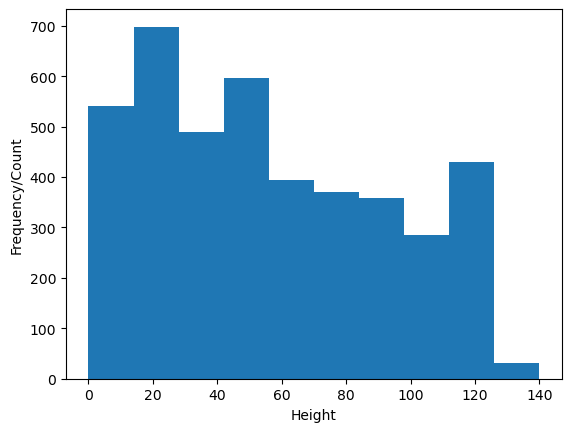

In [23]:
# Create a histogram using the HEIGHT attribute here
import matplotlib.pyplot as plt

plt.hist(ndf['HEIGHT'], bins=10)
plt.xlabel('Height')
plt.ylabel('Frequency/Count')
plt.show()

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [26]:
# How many entries are stumps
len(df[df['COMMON']=='stump'])

100

In [28]:
# How many entries are vacant sites
len(df[df['COMMON'].str.contains('vacant site')])

6

In [ ]:
# Do these number add up?


# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [30]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
scond=df.groupby(['COND'])['COND'].count()

In [31]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.

scond_sort=scond.sort_values()

<Axes: xlabel='COND'>

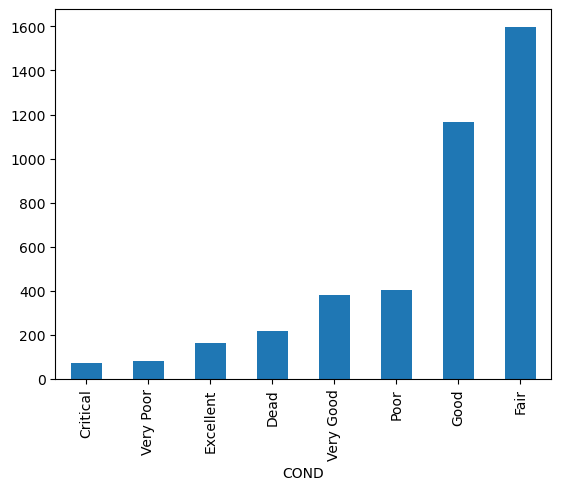

In [32]:
# Plot the Series here
scond_sort.plot.bar()

In [36]:
# How many entries have missing values for the COND attribute? Why are these values missing?
nan_rows=df[df['COND'].isna()]
print(nan_rows)

          ID                           ON  \
118    119.0  George Wilson Center & Park   
119    120.0  George Wilson Center & Park   
268    269.0             Olan Thomas Park   
269    270.0             Olan Thomas Park   
270    271.0             Olan Thomas Park   
...      ...                          ...   
4094  4095.0                 Hawthorne Av   
4148  4149.0                    Rahway Dr   
4166  4167.0                  Delaware Av   
4167  4168.0                  Delaware Av   
4174  4175.0                New London Rd   

                                                   AREA  ADDRESS  \
118                         George Wilson Center & Park      303   
119                         George Wilson Center & Park      303   
268                                    Olan Thomas Park     1000   
269                                    Olan Thomas Park     1000   
270                                    Olan Thomas Park     1000   
...                                                

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [40]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
srisk=df.groupby(['RISK'])['RISK'].count()
srisk

RISK
High          13
Low         3833
Moderate     241
Name: RISK, dtype: int64

In [41]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High

colors = {'High': 'blue', 'Low':'green', 'Moderate': 'yellow'}

([<matplotlib.patches.Wedge at 0x14db7b620>,
 [Text(1.0999450792761147, 0.010991932326113531, 'High'),
  Text(-1.0831495734361938, 0.19179937842702094, 'Low'),
  Text(1.0811789072357736, -0.2026133523449499, 'Moderate')])

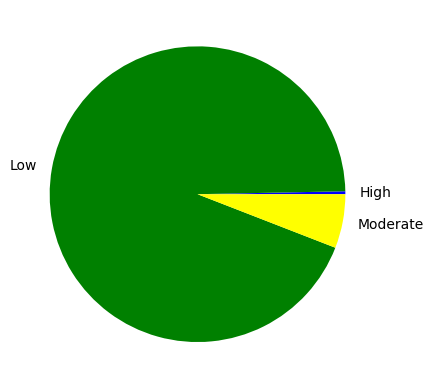

In [43]:
# Plot the pie chart here
plt.pie(srisk.values, labels=srisk.index, colors=['Blue', 'Green', 'Yellow'])

In [45]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
nan_rows_risk=df[df['RISK'].isna()]
print(nan_rows)

          ID                           ON  \
118    119.0  George Wilson Center & Park   
119    120.0  George Wilson Center & Park   
268    269.0             Olan Thomas Park   
269    270.0             Olan Thomas Park   
270    271.0             Olan Thomas Park   
...      ...                          ...   
4094  4095.0                 Hawthorne Av   
4148  4149.0                    Rahway Dr   
4166  4167.0                  Delaware Av   
4167  4168.0                  Delaware Av   
4174  4175.0                New London Rd   

                                                   AREA  ADDRESS  \
118                         George Wilson Center & Park      303   
119                         George Wilson Center & Park      303   
268                                    Olan Thomas Park     1000   
269                                    Olan Thomas Park     1000   
270                                    Olan Thomas Park     1000   
...                                                

# Indexing

In [46]:
# Display row by position 1
df.iloc[1]

ID                            12.0
ON                       Elan Park
AREA                     Elan Park
ADDRESS                          2
STREET                 Blue Hen Rg
SITE                          12.0
SIDE                         Front
ASSIGNED                     False
COMMON         arborvitae, eastern
BOTANICAL       Thuja occidentalis
CULTIVAR                       NaN
DBH                           11.0
REMOVAL                        NaN
STEMS                          1.0
COND                     Very Good
MAINTPRIM                      NaN
OBSERVE                        NaN
INSPECT                      False
LOCATION                      Park
NOTES                          NaN
DATE                     9/29/2015
TIME                    2:14:17 PM
STAFF                           LM
XCOORD                553196.93222
YCOORD                611651.08843
FAILURE                 Improbable
LIKELIHOOD                Unlikely
TARGET                      Medium
CONSEQ              

In [47]:
# Display row by label 1
df.loc[0]

ID                            11.0
ON                       Elan Park
AREA                     Elan Park
ADDRESS                          2
STREET                 Blue Hen Rg
SITE                          11.0
SIDE                         Front
ASSIGNED                     False
COMMON         arborvitae, eastern
BOTANICAL       Thuja occidentalis
CULTIVAR                       NaN
DBH                           15.0
REMOVAL                        NaN
STEMS                          2.0
COND                          Good
MAINTPRIM                      NaN
OBSERVE                        NaN
INSPECT                      False
LOCATION                      Park
NOTES                          NaN
DATE                     9/29/2015
TIME                    2:12:18 PM
STAFF                           LM
XCOORD                553199.23595
YCOORD                611651.08843
FAILURE                   Possible
LIKELIHOOD                Unlikely
TARGET                      Medium
CONSEQ              